# Pulsar Classification Project Proposal
###### By Bernie Leung, Phillip Li, Glen Ren, and Helena Tremblay

### Introduction
Pulsars are neutron stars: collapsed cores of massive supergiant stars. They emit rhythmic pulses of strong radiation due to their electromagnetism dipoles. While pulsars are rotating and emitting light at regular intervals, it looks on earth as if they're twinkling.

For this project, we will be using the HTRU2 dataset, with samples of pulsar candidates collected during the High Time Resolution Universe Survey, which “intends to be an all-sky survey for pulsars and short-duration radio transients, with a strong focus on the lower Galactic latitudes, [where the higher frequency resolution for the negation of interstellar dispersion are made used the most]” (Keith, https://academic.oup.com/mnras/article/409/2/619/1037409, page 620).

Our objective is to classify the pulsar candidates as either real pulsars or false candidates caused by RFI and noise. A binary classification system will be used to represent whether the pulsar is real or not. With 16,259 false candidates and 1,639 real pulsars that are checked by humans, the real pulsars are a minority positive class, and false candidates are the majority negative class in this dataset. The class labels used are 0 (false candidate) and 1 (real pulsar).

The data itself is in two formats: CSV and ARFF. Each row corresponds to a candidate, each column a variable with the last column being the candidate's class.

In [2]:
library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [4]:
pulsar_data <- read_csv("https://raw.githubusercontent.com/glenren/dsci_100_group_24/main/HTRU_2.csv", col_names = c("Mean of the integrated profile", 
    "Standard deviation of the integrated profile",
    "Excess kurtosis of the integrated profile",
    "Skewness of the integrated profile",
    "Mean of the DM-SNR curve",
    "Standard deviation of the DM-SNR curve",
    "Excess kurtosis of the DM-SNR curve",
    "Skewness of the DM-SNR curve",
    "Class") ) %>%
    mutate(Class = as_factor(Class))

colnames(pulsar_data) <- make.names(colnames(pulsar_data))


pulsar_split <- initial_split(pulsar_data, prop = 0.75, strata = Class)  
pulsar_train <- training(pulsar_split)   
pulsar_test <- testing(pulsar_split)

pulsar_train
pulsar_test

Parsed with column specification:
cols(
  `Mean of the integrated profile` = col_double(),
  `Standard deviation of the integrated profile` = col_double(),
  `Excess kurtosis of the integrated profile` = col_double(),
  `Skewness of the integrated profile` = col_double(),
  `Mean of the DM-SNR curve` = col_double(),
  `Standard deviation of the DM-SNR curve` = col_double(),
  `Excess kurtosis of the DM-SNR curve` = col_double(),
  `Skewness of the DM-SNR curve` = col_double(),
  Class = col_double()
)



Mean.of.the.integrated.profile,Standard.deviation.of.the.integrated.profile,Excess.kurtosis.of.the.integrated.profile,Skewness.of.the.integrated.profile,Mean.of.the.DM.SNR.curve,Standard.deviation.of.the.DM.SNR.curve,Excess.kurtosis.of.the.DM.SNR.curve,Skewness.of.the.DM.SNR.curve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.234571412,-0.69964840,3.1998328,19.110426,7.975532,74.24222,0
102.50781,58.88243,0.465318154,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.323328365,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.068414638,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.600866079,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.531904850,0.41672112,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.031460220,-0.11216757,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.158322759,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.452688025,0.17034738,2.3319398,14.486853,9.001004,107.97251,0


Mean.of.the.integrated.profile,Standard.deviation.of.the.integrated.profile,Excess.kurtosis.of.the.integrated.profile,Skewness.of.the.integrated.profile,Mean.of.the.DM.SNR.curve,Standard.deviation.of.the.DM.SNR.curve,Excess.kurtosis.of.the.DM.SNR.curve,Skewness.of.the.DM.SNR.curve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
107.25781,39.49649,0.46588196,1.1628771,4.0794314,24.980418,7.3970799,57.784738,0
142.07812,45.28807,-0.32032843,0.2839525,5.3762542,29.009897,6.0762658,37.831393,0
133.25781,44.05824,-0.08105986,0.1153615,1.6321070,12.007806,11.9720666,195.543448,0
109.64062,49.01765,0.13763583,-0.2566998,1.5083612,12.072901,13.3679256,223.438419,0
99.36719,41.57220,1.54719697,4.1541060,27.5551839,61.719016,2.2088080,3.662680,1
95.86719,42.05992,0.32638692,0.8035018,1.8327759,12.248969,11.2493310,177.230771,0
117.36719,53.90861,0.25795344,-0.4050491,6.0183946,24.766123,4.8077832,25.522616,0
110.10938,41.31817,0.09486040,0.6831126,1.0100334,13.026275,14.6665108,231.204136,0
102.32812,48.98040,0.31572941,-0.2021833,1.8988294,13.839040,11.6199387,172.130373,0


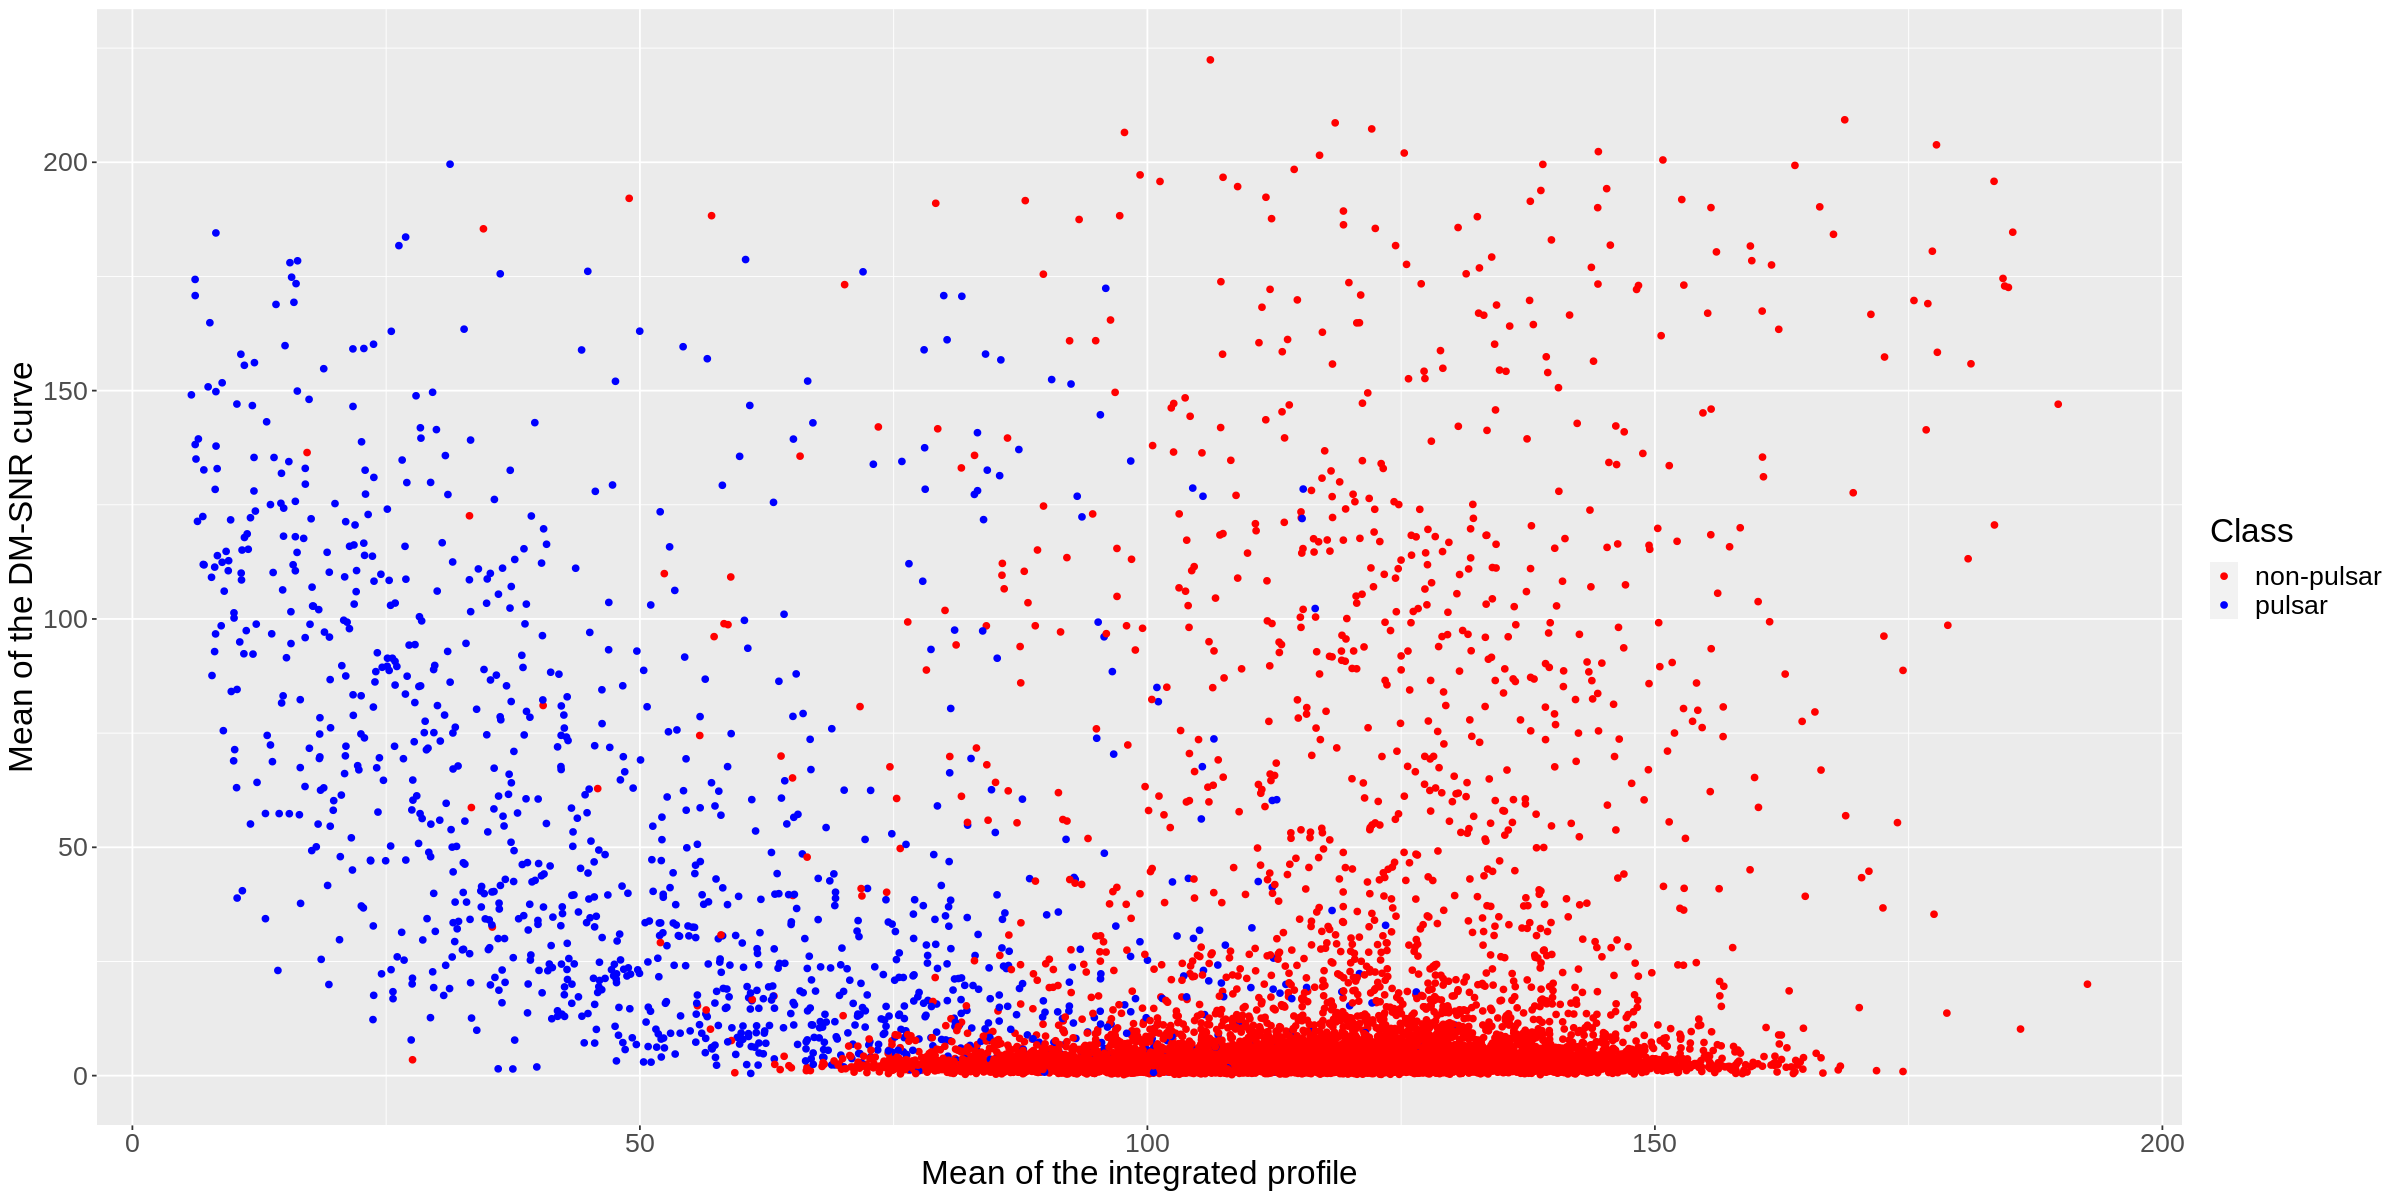

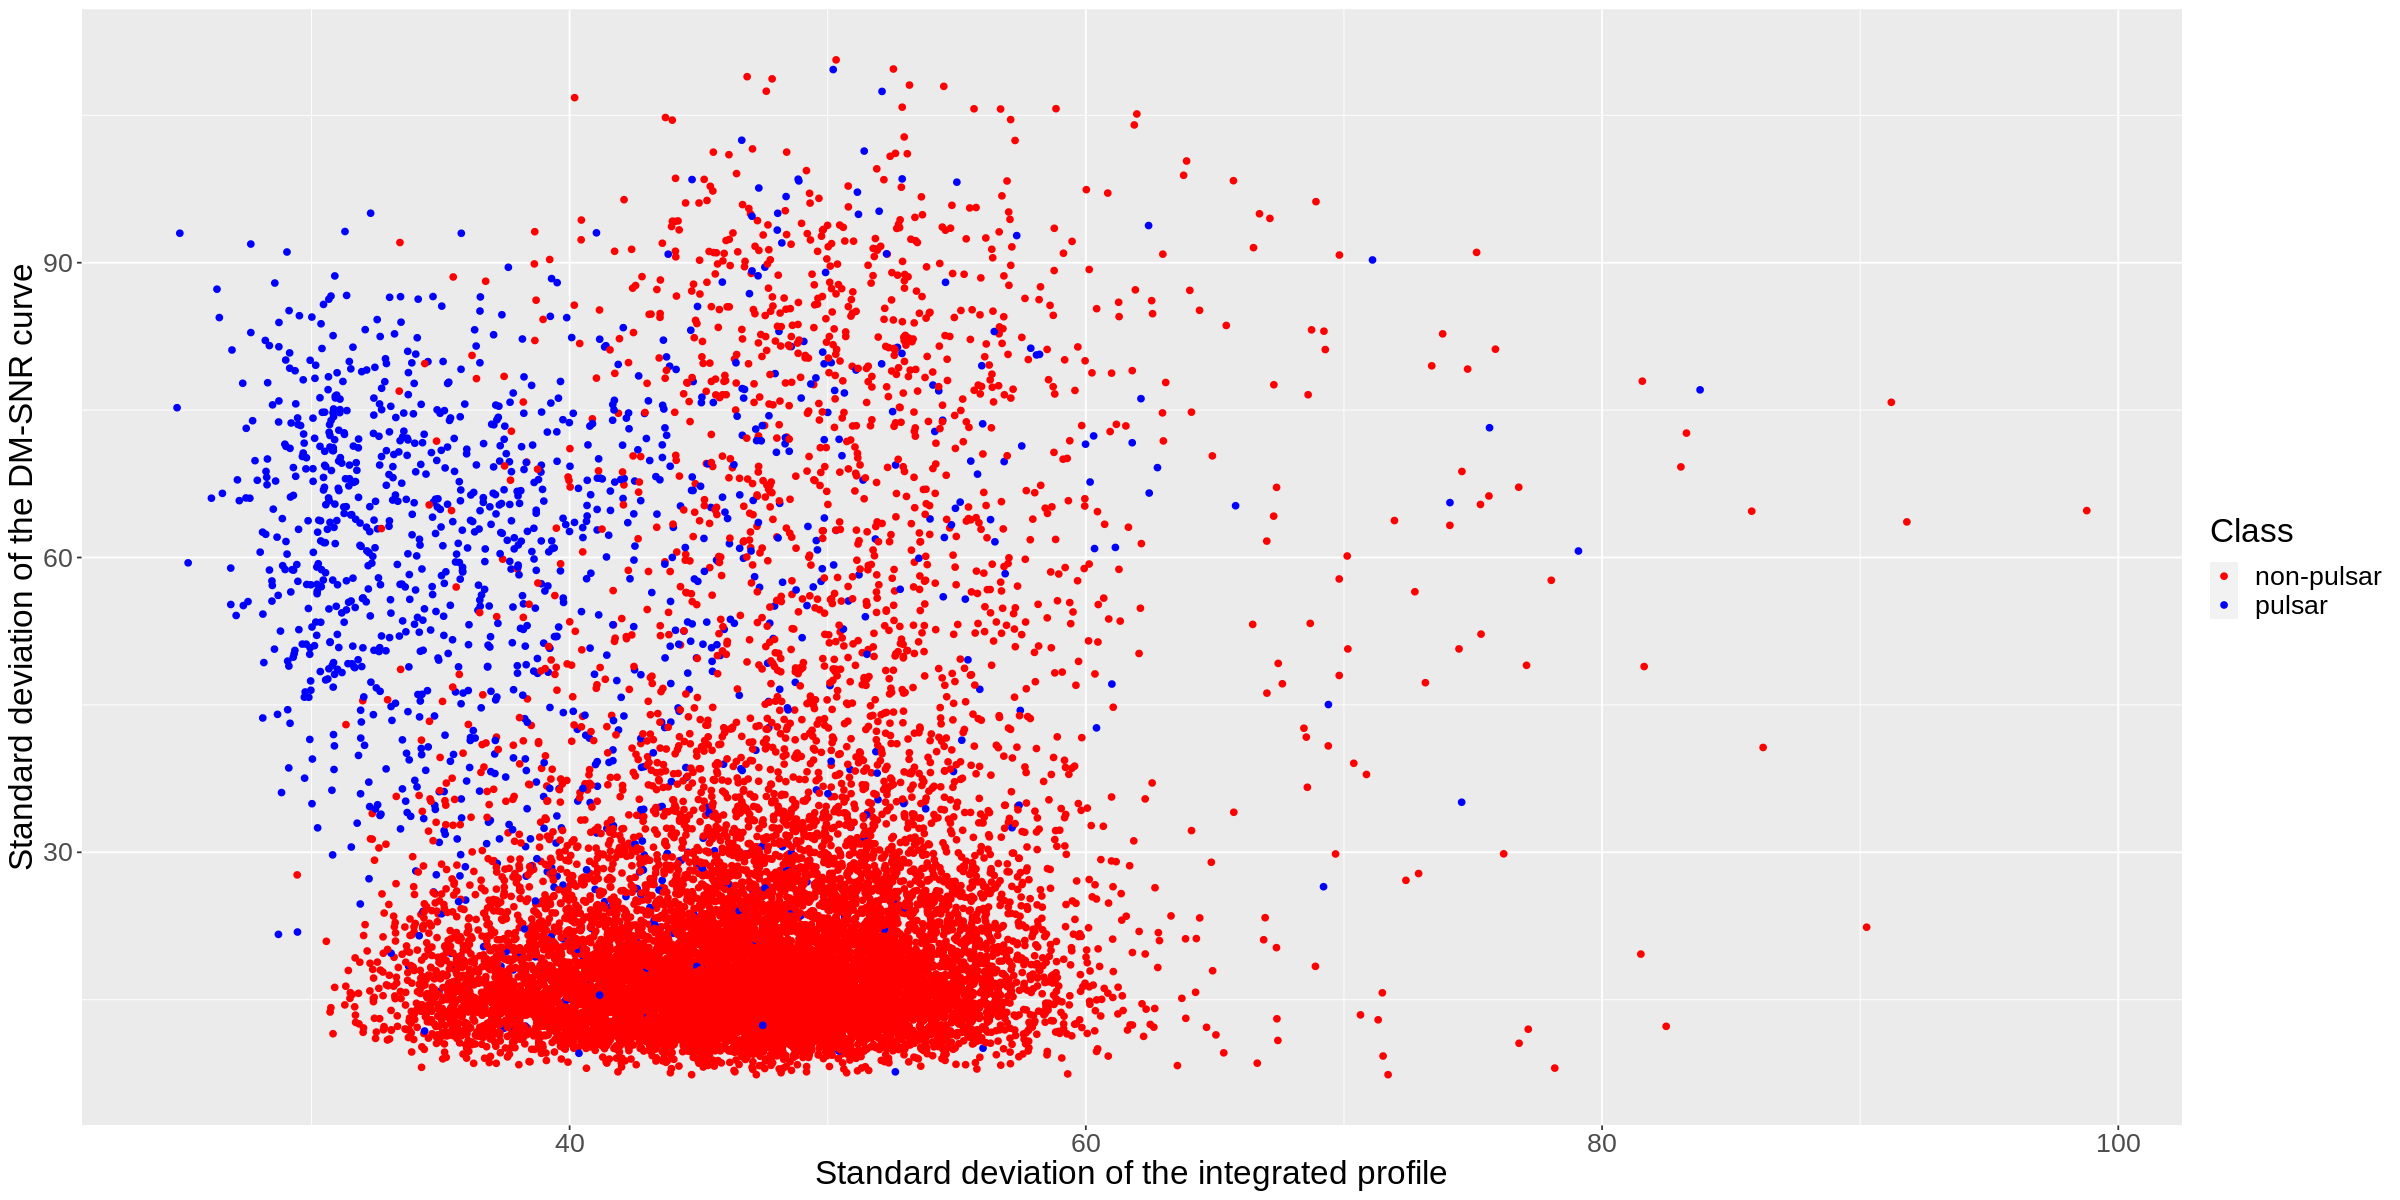

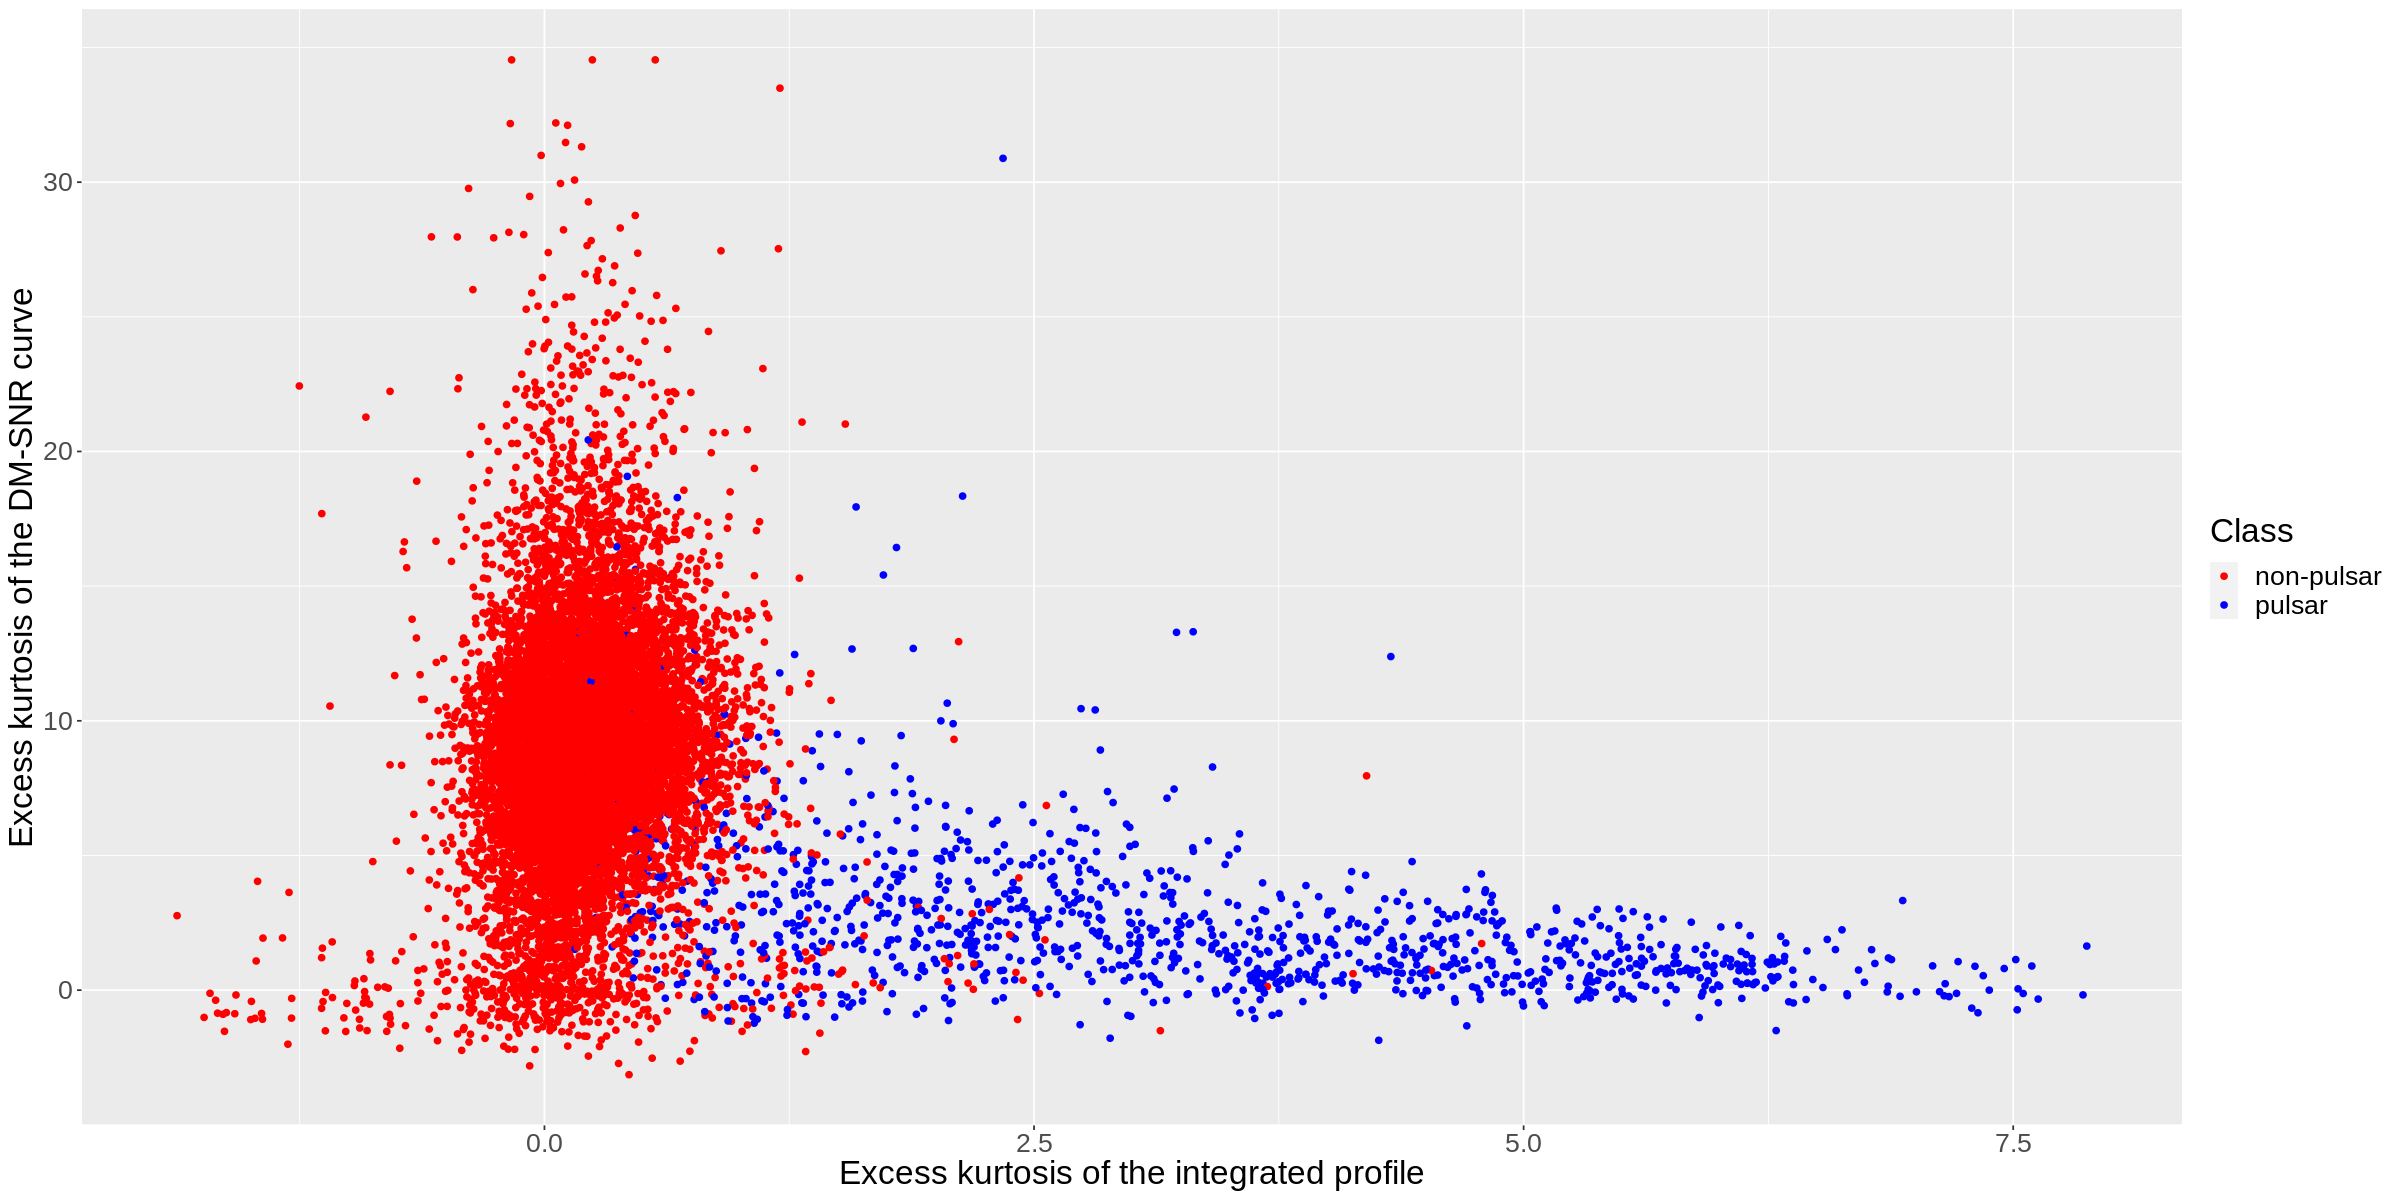

`summarise()` ungrouping output (override with `.groups` argument)



Class,Mean.of.the.integrated.profile,Standard.deviation.of.the.integrated.profile,Excess.kurtosis.of.the.integrated.profile,Skewness.of.the.integrated.profile,Mean.of.the.DM.SNR.curve,Standard.deviation.of.the.DM.SNR.curve,Excess.kurtosis.of.the.DM.SNR.curve,Skewness.of.the.DM.SNR.curve
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,116.66137,47.37616,0.2085275,0.373169,8.841845,23.30397,8.883004,114.19889
1,57.29525,38.86825,3.0847349,15.185051,49.491434,56.22237,2.806568,18.60287


Warning message in Ops.factor(left, right):
“‘-’ not meaningful for factors”


Class,Mean.of.the.integrated.profile,Standard.deviation.of.the.integrated.profile,Excess.kurtosis.of.the.integrated.profile,Skewness.of.the.integrated.profile,Mean.of.the.DM.SNR.curve,Standard.deviation.of.the.DM.SNR.curve,Excess.kurtosis.of.the.DM.SNR.curve,Skewness.of.the.DM.SNR.curve
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,-59.36612,-8.507902,2.876207,14.81188,40.64959,32.9184,-6.076436,-95.59602


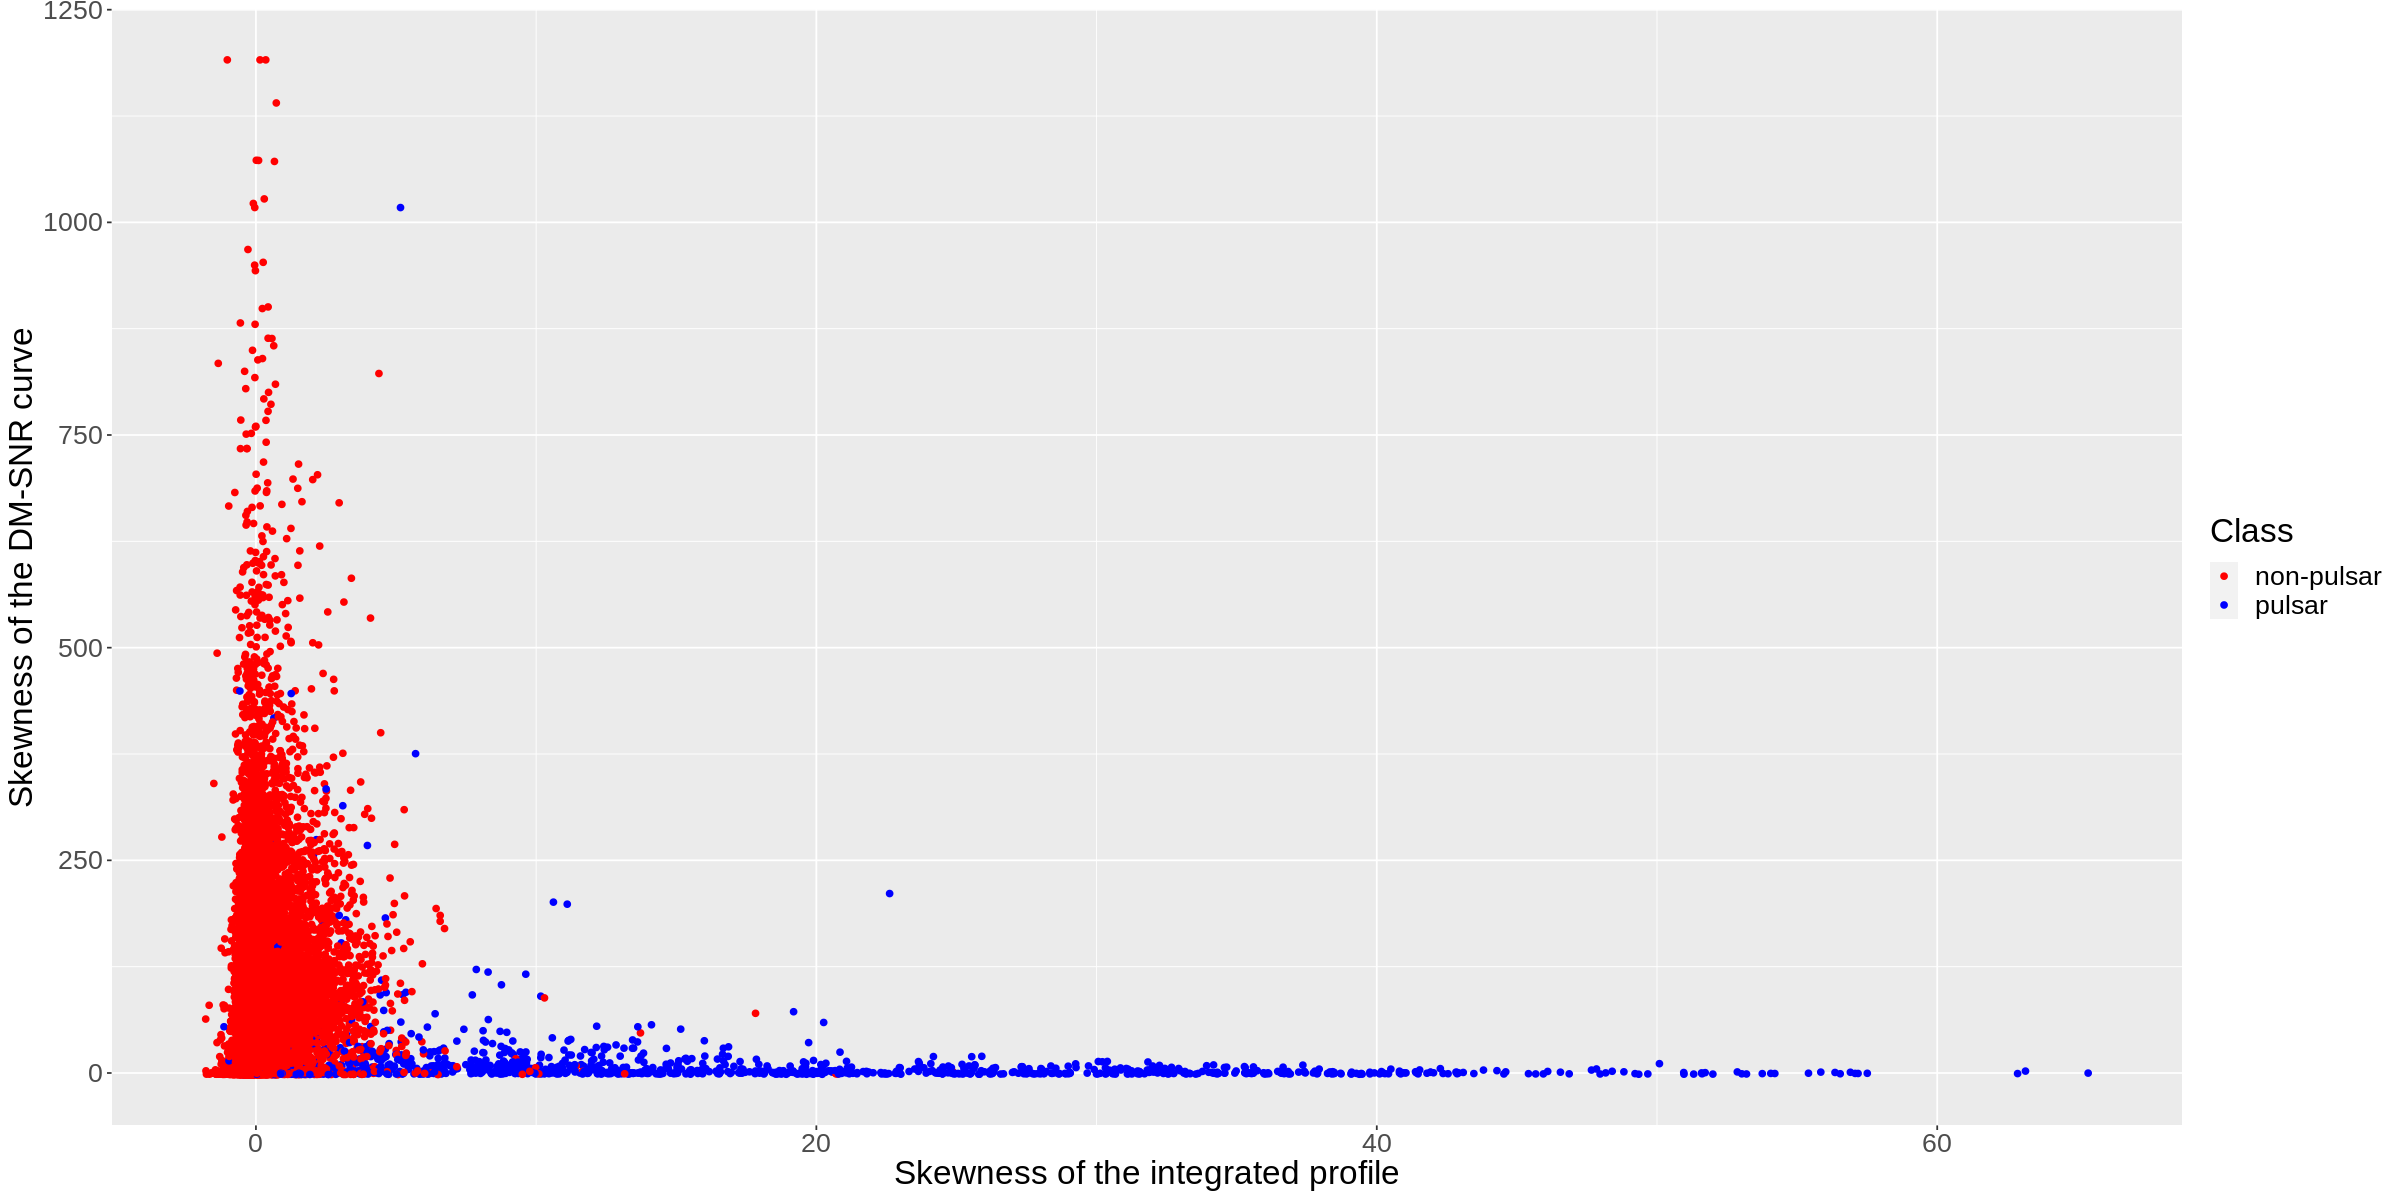

In [5]:
options(repr.plot.width = 20, repr.plot.height = 10)
pulsar_plot_mean <- pulsar_train %>%
    ggplot(aes(x = Mean.of.the.integrated.profile , y = Mean.of.the.DM.SNR.curve, colour = Class)) + 
        geom_point() +
        labs(x = "Mean of the integrated profile", y = "Mean of the DM-SNR curve", colour = "Class") +
        scale_color_manual(labels = c("non-pulsar", "pulsar"), values = c("red", "blue")) +
        theme(text = element_text(size=20))

pulsar_plot_mean



options(repr.plot.width = 20, repr.plot.height = 10) 
pulsar_plot_sd <- pulsar_train %>%
    ggplot(aes(x = Standard.deviation.of.the.integrated.profile , y = Standard.deviation.of.the.DM.SNR.curve, color = Class)) + 
        geom_point() +
        labs(x = "Standard deviation of the integrated profile", y = "Standard deviation of the DM-SNR curve", colour = "Class") +
        scale_color_manual(labels = c("non-pulsar", "pulsar"), values = c("red", "blue")) +
        theme(text = element_text(size=20))

pulsar_plot_sd



options(repr.plot.width = 20, repr.plot.height = 10) 
pulsar_plot_excess <- pulsar_train %>%
    ggplot(aes(x = Excess.kurtosis.of.the.integrated.profile , y = Excess.kurtosis.of.the.DM.SNR.curve, colour = Class)) + 
        geom_point() +
        labs(x = "Excess kurtosis of the integrated profile", y = "Excess kurtosis of the DM-SNR curve", colour = "Class") + 
        scale_color_manual(labels = c("non-pulsar", "pulsar"), values = c("red", "blue")) +
        theme(text = element_text(size=20))

pulsar_plot_excess


options(repr.plot.width = 20, repr.plot.height = 10) 
pulsar_plot_skewness <- pulsar_train %>%
    ggplot(aes(x = Skewness.of.the.integrated.profile , y = Skewness.of.the.DM.SNR.curve, colour = Class)) + 
        geom_point() +
        labs(x = "Skewness of the integrated profile", y = "Skewness of the DM-SNR curve", colour = "Class") +
        scale_color_manual(labels = c("non-pulsar", "pulsar"), values = c("red", "blue")) +
        theme(text = element_text(size=20))

pulsar_plot_skewness

# summary data set
pulsar_averages <- pulsar_train %>%
    group_by(Class) %>%
    summarize(across(Mean.of.the.integrated.profile:Skewness.of.the.DM.SNR.curve, mean))

pulsar_averages

# differences
pulsar_differences <- slice(pulsar_averages, 2) - slice(pulsar_averages, 1)

pulsar_differences

### Methods

We will classify candidates from the HTRU2 dataset as either pulsars or RFI/noise based on the variables 'mean of integrated profile', 'mean of DM SNR curve', and 'skewness of DM SNR curve'. These variables were chosen because they have the strongest correlation with the pulsar or RFI/noise classification variable, as shown as the difference in mean by class in the training dataset.

We will use the k-nearest neighbors algorithm to design or model, with the k-value being decided through a 5-fold cross-validation on our training set with 10 K values for tuning. We will visualize our findings with graphs showing the candidates classified using our algorithm.

### Expected Outcomes

Our expected outcome is to be able to develop an accurate classifier based on the variables mentioned in methods.

An accurate classifier will help scientists focus only on pulsars as they are of high interest to scientific study. Pulsars, due to their lighthouse-like behaviour, are tools to help with research regarding extreme states of matter and exoplanets. It is complicated to determine whether pulsar candidates are real pulsars or not, so having an accurate classifier would greatly improve efficiency.

If our classifier works accurately, then we have proof of a link between the variables we chose and pulsar status. The next question that arises would be how those variables relate to one another, beyond being individually considered?

If our classifier doesn't work accurately, then further questions to consider would be what, then, is the best method for pulsar determination, and would it be possible at all to develop an accurate classifier? And specifically, would it be possible to do so within the dataset that we are working with?